# Exercício 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
 
from io import StringIO
import pydot

# import warnings filter
from warnings import simplefilter

In [2]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Create Database
x, y = make_moons(n_samples = 500, noise = 0.3, random_state=42)

# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
fig = plt.figure(figsize=(6,6))
plt.plot(x[idx0,0], x[idx0,1], 'o', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'gx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.show()

NameError: name 'idx0' is not defined

<Figure size 432x432 with 0 Axes>

In [5]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='gini')

# Fit the classifier on the training features and labels.
clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.85


[Text(203.5945945945946, 209.07692307692307, 'X[1] <= 0.374\ngini = 0.499\nsamples = 400\nvalue = [207, 193]'),
 Text(104.05945945945948, 192.35076923076923, 'X[0] <= -0.436\ngini = 0.36\nsamples = 225\nvalue = [53, 172]'),
 Text(95.01081081081082, 175.62461538461537, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(113.10810810810811, 175.62461538461537, 'X[1] <= -0.046\ngini = 0.259\nsamples = 203\nvalue = [31, 172]'),
 Text(36.1945945945946, 158.89846153846153, 'X[1] <= -0.343\ngini = 0.092\nsamples = 124\nvalue = [6, 118]'),
 Text(27.145945945945947, 142.1723076923077, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(45.24324324324325, 142.1723076923077, 'X[1] <= -0.342\ngini = 0.211\nsamples = 50\nvalue = [6, 44]'),
 Text(36.1945945945946, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(54.29189189189189, 125.44615384615385, 'X[0] <= 1.278\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(45.24324324324325, 108.72, 'X[0] <= 0.839\ngini = 0.285\nsamp

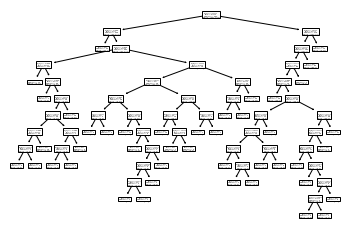

In [6]:
plot_tree(clf)

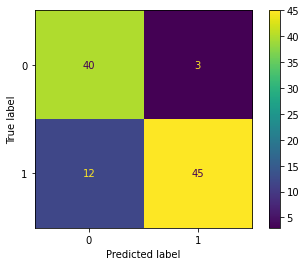

In [7]:
# Plot the confusion matrix.
plot_confusion_matrix(clf, x_test, y_test) 
plt.show() 

In [10]:
# Set parameters for grid-search.
param_grid = [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 5, 10, 15, 25], 'max_leaf_nodes': [None, 2, 5, 10, 15, 25, 50, 100]}]

# Instantiate DT class.
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10}
0.9120000000000001


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    0.6s finished


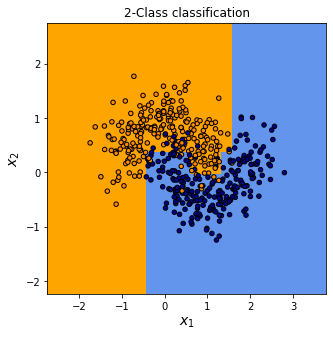

In [11]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.show()

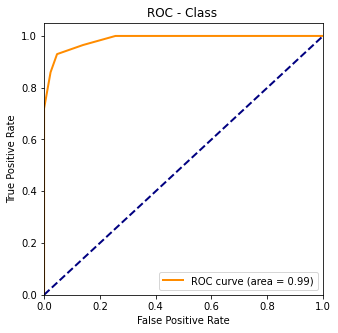

In [20]:
# Getting the probabilities for each class.
y_prob = grid_search.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.show()

In [14]:
# Create Bagging classifier.
bagging_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1,random_state=42)

# Fit the classifier on the training features and labels.
bagging_clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = bagging_clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.9


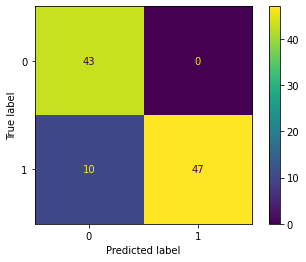

In [15]:
# Plot the confusion matrix.
plot_confusion_matrix(bagging_clf, x_test, y_test) 
plt.show()

In [17]:
# Set parameters for grid-search.
param_grid = [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 5, 10, 15, 25], 'max_leaf_nodes': [None, 2, 5, 10, 15, 25, 50, 100]}]

# Instantiate DT class.
dtc = BaggingClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s


{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10}
0.9120000000000001


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    1.8s finished


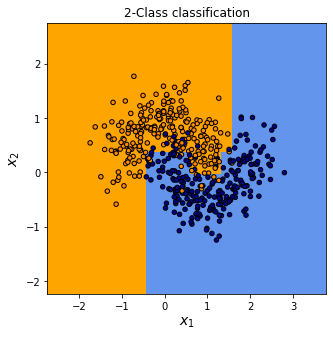

In [18]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.show()

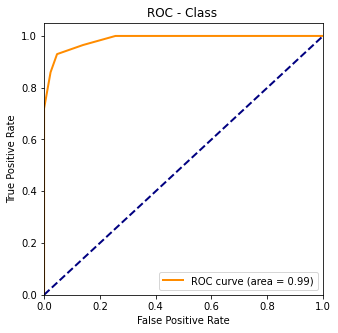

In [19]:
# Getting the probabilities for each class.
y_prob = grid_search.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.show()